In [1]:
import os
os.chdir(os.pardir)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import vapor
from vapor.models import Cambium

2021-01-29 14:11:13,693 [MainThread  ] [INFO ]  Starting log for vapor...


In [2]:
os.getcwd()

'/lustre/eaglefs/projects/vapor/vapor-open'

In [3]:

dfs = []

# --- Define Optimization Variables ---
aggregate_region = 'pca'
opt_vars = ['project_return_aftertax_npv']#['marginal_cost_mwh']
scenarios = ['StdScen20_HighRECost', 'StdScen20_LowRECost', 'StdScen20_MidCase']
techs = ['pv', 'wind']
batt_sizes = [0., 25., 100.]
batt_durations = [4.]

for opt_var in opt_vars:
    for scenario in scenarios:
        for tech in techs:
            for batt_size in batt_sizes:
                for batt_duration in batt_durations:
                    file = f"{aggregate_region}_best_{tech}_{scenario}_{opt_var}_batt_{batt_size}_{batt_duration}.pkl"
                    fp = os.path.join('results',file)
                    dfs.append(pd.read_pickle(fp))


results = pd.concat(dfs, axis='rows')
results.reset_index(drop=True, inplace=True)

# --- Map on States ---
hierarchy = pd.read_csv(os.path.join('data','geography','region_hierarchy.csv'))
hierarchy.rename({'pca':'region'}, axis='columns', inplace=True)
df = results.merge(hierarchy[['region','state']], on='region', how='left')
                        
# --- Sort Systems to Keep best by State ---
df.sort_values(opt_vars[0], inplace=True)
df.drop_duplicates(['scenario','state','tech','batt_size'], inplace=True) #keep best performing system by region/scenario

# --- Clean up ---
df['lifetime_cambium_co2_rate_avg_mwh'] = df['lifetime_cambium_co2_rate_avg'] / df['lifetime_output_mwh']
df['lifetime_cambium_co2_rate_avg_mw'] = df['lifetime_cambium_co2_rate_avg'] / df['system_capacity']
df['lifetime_cambium_co2_rate_lrmer_mwh'] = df['lifetime_cambium_co2_rate_lrmer'] / df['lifetime_output_mwh']
df['lifetime_cambium_co2_rate_lrmer_mw'] = df['lifetime_cambium_co2_rate_lrmer'] / df['system_capacity']
df['lifetime_cambium_grid_value'] = df['lifetime_cambium_grid_value'] / df['system_capacity']

df.head()

,adjusted_installed_cost,analysis_period_irr,cash_for_debt_service,cbi_fedtax_total,cbi_statax_total,cbi_total,cbi_total_fed,cbi_total_oth,cbi_total_sta,cbi_total_uti,cf_length,cost_debt_upfront,cost_financing,cost_installed,cost_installedperwatt,cost_prefinancing,debt_fraction,depr_alloc_custom,depr_alloc_macrs_15,depr_alloc_macrs_5,depr_alloc_none,depr_alloc_none_percent,depr_alloc_sl_15,depr_alloc_sl_20,depr_alloc_sl_39,depr_alloc_sl_5,depr_alloc_total,depr_fedbas_after_itc_custom,depr_fedbas_after_itc_macrs_15,depr_fedbas_after_itc_macrs_5,depr_fedbas_after_itc_sl_15,depr_fedbas_after_itc_sl_20,depr_fedbas_after_itc_sl_39,depr_fedbas_after_itc_sl_5,depr_fedbas_after_itc_total,depr_fedbas_cbi_reduc_custom,depr_fedbas_cbi_reduc_macrs_15,depr_fedbas_cbi_reduc_macrs_5,depr_fedbas_cbi_reduc_sl_15,depr_fedbas_cbi_reduc_sl_20,depr_fedbas_cbi_reduc_sl_39,depr_fedbas_cbi_reduc_sl_5,depr_fedbas_cbi_reduc_total,depr_fedbas_custom,depr_fedbas_first_year_bonus_custom,depr_fedbas_first_year_bonus_macrs_15,depr_fedbas_first_year_bonus_macrs_5,depr_fedbas_first_year_bonus_sl_15,depr_fedbas_first_year_bonus_sl_20,depr_fedbas_first_year_bonus_sl_39,depr_fedbas_first_year_bonus_sl_5,depr_fedbas_first_year_bonus_total,depr_fedbas_fixed_amount_custom,depr_fedbas_fixed_amount_macrs_15,depr_fedbas_fixed_amount_macrs_5,depr_fedbas_fixed_amount_sl_15,depr_fedbas_fixed_amount_sl_20,depr_fedbas_fixed_amount_sl_39,depr_fedbas_fixed_amount_sl_5,depr_fedbas_fixed_amount_total,depr_fedbas_ibi_reduc_custom,depr_fedbas_ibi_reduc_macrs_15,depr_fedbas_ibi_reduc_macrs_5,depr_fedbas_ibi_reduc_sl_15,depr_fedbas_ibi_reduc_sl_20,depr_fedbas_ibi_reduc_sl_39,depr_fedbas_ibi_reduc_sl_5,depr_fedbas_ibi_reduc_total,depr_fedbas_itc_fed_reduction_custom,depr_fedbas_itc_fed_reduction_macrs_15,depr_fedbas_itc_fed_reduction_macrs_5,depr_fedbas_itc_fed_reduction_sl_15,depr_fedbas_itc_fed_reduction_sl_20,depr_fedbas_itc_fed_reduction_sl_39,depr_fedbas_itc_fed_reduction_sl_5,depr_fedbas_itc_fed_reduction_total,depr_fedbas_itc_sta_reduction_custom,depr_fedbas_itc_sta_reduction_macrs_15,depr_fedbas_itc_sta_reduction_macrs_5,depr_fedbas_itc_sta_reduction_sl_15,depr_fedbas_itc_sta_reduction_sl_20,depr_fedbas_itc_sta_reduction_sl_39,depr_fedbas_itc_sta_reduction_sl_5,depr_fedbas_itc_sta_reduction_total,depr_fedbas_macrs_15,depr_fedbas_macrs_5,depr_fedbas_percent_amount_custom,depr_fedbas_percent_amount_macrs_15,depr_fedbas_percent_amount_macrs_5,depr_fedbas_percent_amount_sl_15,depr_fedbas_percent_amount_sl_20,depr_fedbas_percent_amount_sl_39,depr_fedbas_percent_amount_sl_5,depr_fedbas_percent_amount_total,depr_fedbas_percent_custom,depr_fedbas_percent_macrs_15,depr_fedbas_percent_macrs_5,depr_fedbas_percent_qual_custom,depr_fedbas_percent_qual_macrs_15,depr_fedbas_percent_qual_macrs_5,depr_fedbas_percent_qual_sl_15,depr_fedbas_percent_qual_sl_20,depr_fedbas_percent_qual_sl_39,depr_fedbas_percent_qual_sl_5,depr_fedbas_percent_qual_total,depr_fedbas_percent_sl_15,depr_fedbas_percent_sl_20,depr_fedbas_percent_sl_39,depr_fedbas_percent_sl_5,depr_fedbas_percent_total,depr_fedbas_prior_itc_custom,depr_fedbas_prior_itc_macrs_15,depr_fedbas_prior_itc_macrs_5,depr_fedbas_prior_itc_sl_15,depr_fedbas_prior_itc_sl_20,depr_fedbas_prior_itc_sl_39,depr_fedbas_prior_itc_sl_5,depr_fedbas_prior_itc_total,depr_fedbas_sl_15,depr_fedbas_sl_20,depr_fedbas_sl_39,depr_fedbas_sl_5,depr_fedbas_total,depr_stabas_after_itc_custom,depr_stabas_after_itc_macrs_15,depr_stabas_after_itc_macrs_5,depr_stabas_after_itc_sl_15,depr_stabas_after_itc_sl_20,depr_stabas_after_itc_sl_39,depr_stabas_after_itc_sl_5,depr_stabas_after_itc_total,depr_stabas_cbi_reduc_custom,depr_stabas_cbi_reduc_macrs_15,depr_stabas_cbi_reduc_macrs_5,depr_stabas_cbi_reduc_sl_15,depr_stabas_cbi_reduc_sl_20,depr_stabas_cbi_reduc_sl_39,depr_stabas_cbi_reduc_sl_5,depr_stabas_cbi_reduc_total,depr_stabas_custom,depr_stabas_first_year_bonus_custom,depr_stabas_first_year_bonus_macrs_15,depr_stabas_first_year_bonus_macrs_5,depr_stabas_first_year_bonus

In [5]:
df.cambium_co2_rate_lrmer_2022.sum()

39714286.666783616

In [7]:
(df.system_capacity.sum())/1000

86400.0

(0.0, 1000.0)

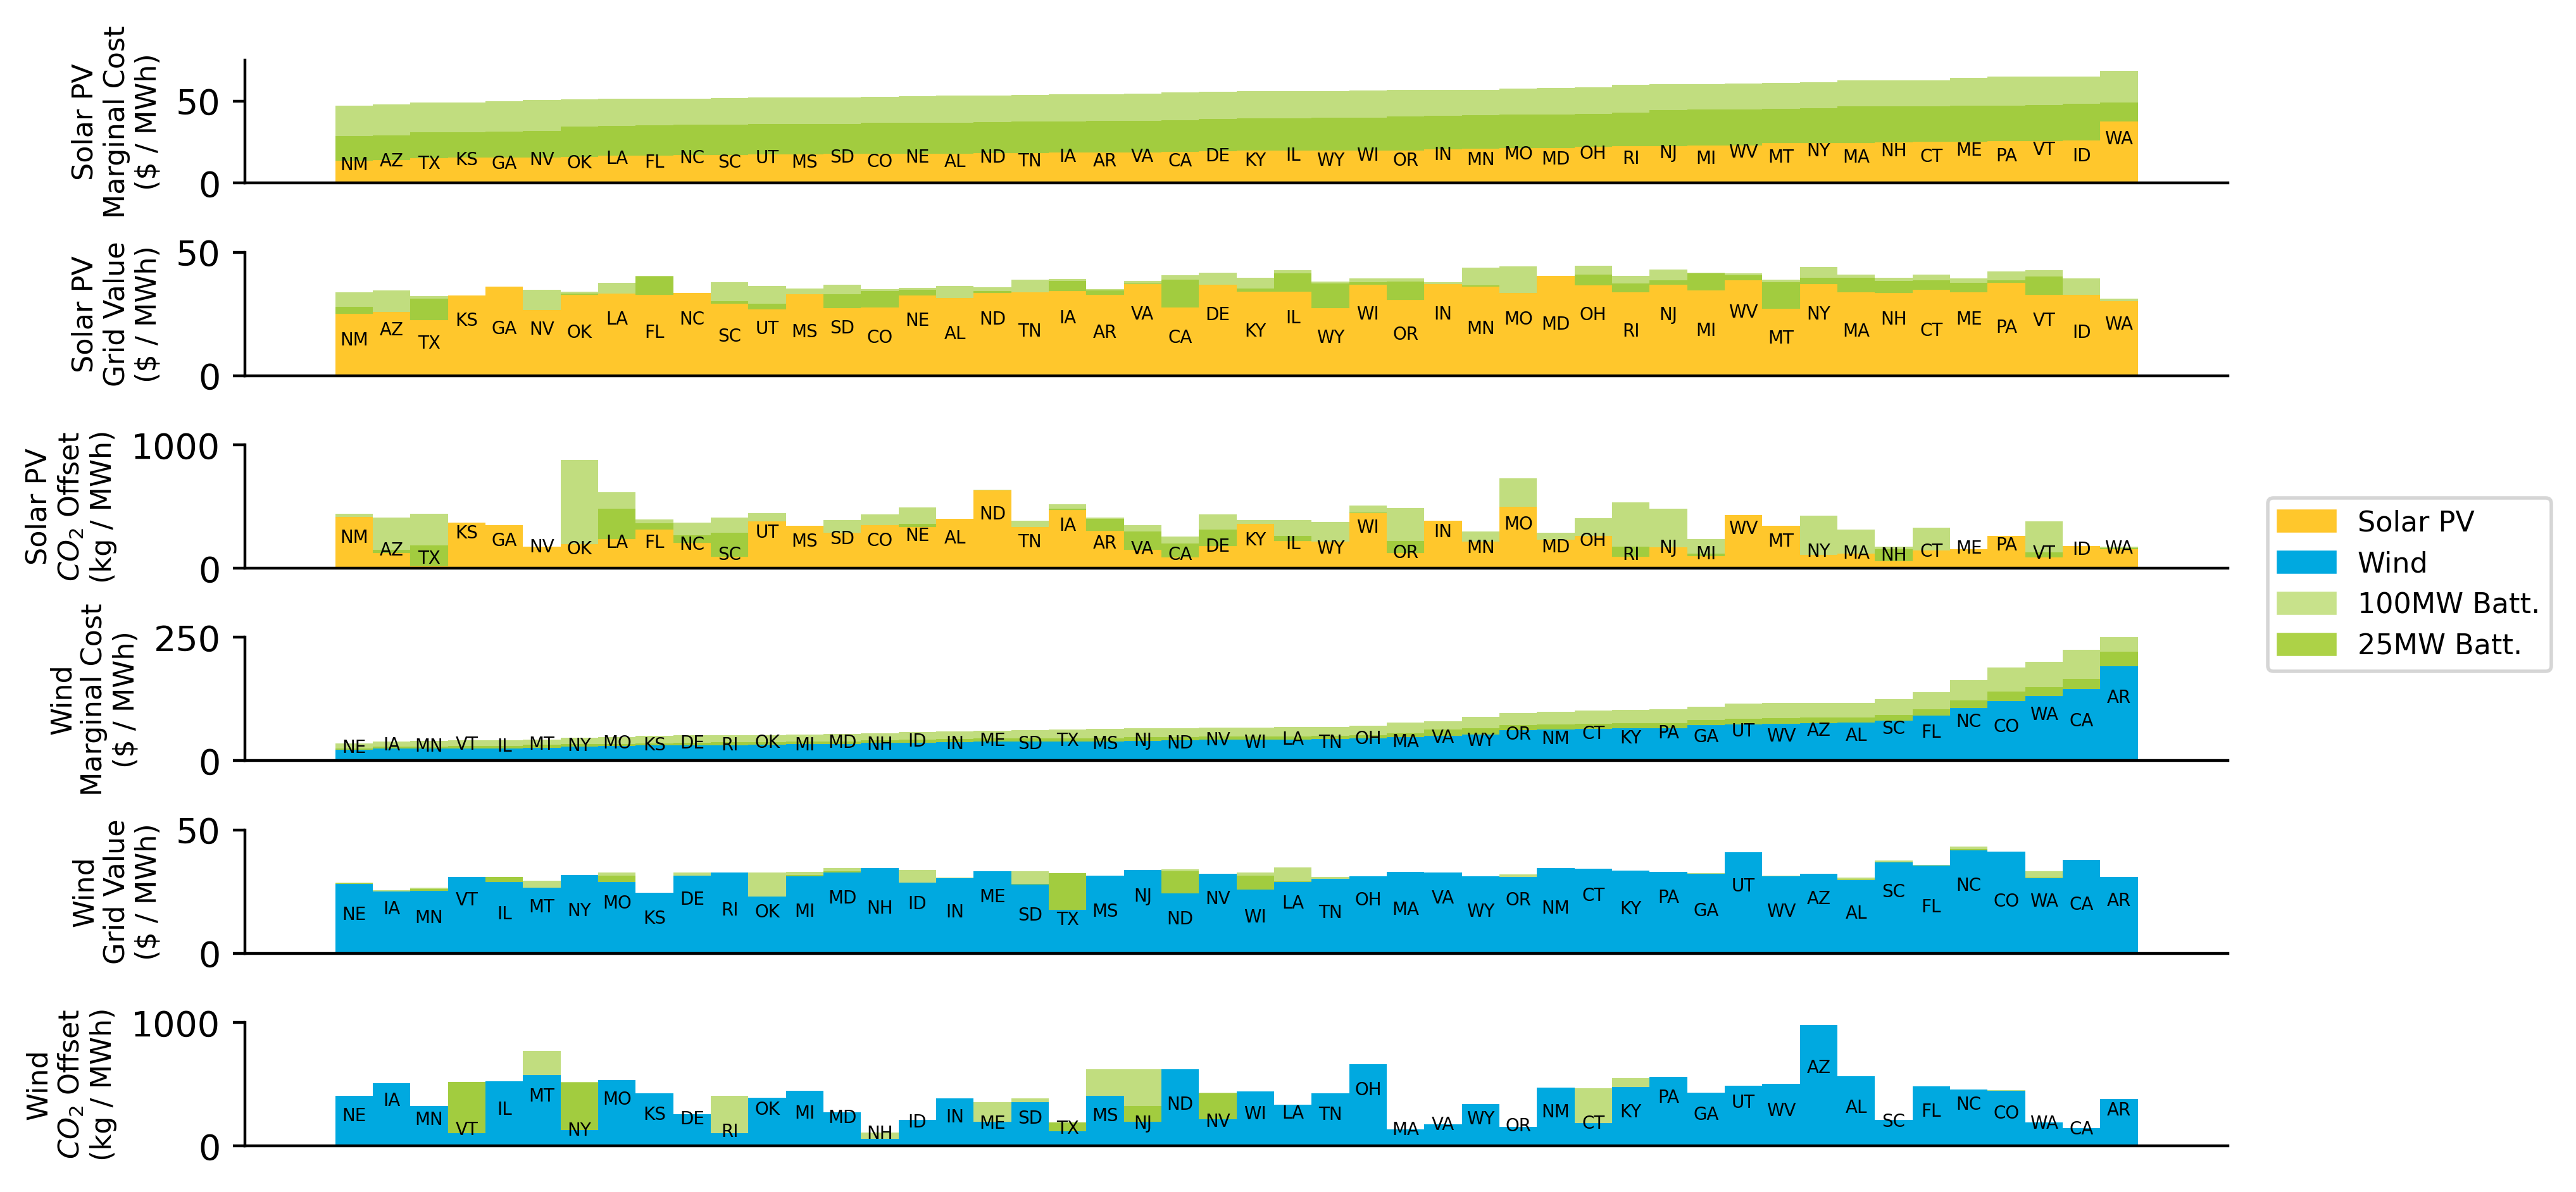

In [4]:

plot_df = df.copy()
opt_var = opt_vars[0]
plot_vars = ['marginal_cost_mwh',
             'grid_value_per_mwh',
             #'lifetime_cambium_co2_rate_avg_mwh',
             'lifetime_cambium_co2_rate_lrmer_mwh']
sort_var = plot_vars[0]
ascending=True
batt_sizes=[25,100]

label_dict = {
    'marginal_cost_mwh':'Marginal Cost\n($ / MWh)',
    'grid_value_per_mwh':'Grid Value\n($ / MWh)',
    'lifetime_cambium_grid_value_mw':'Grid Value\n($ / MW)',
    'lifetime_cambium_co2_rate_avg_mw':'$CO_2 (\overline{x})$ Offset\n(kg / MW)',
    'lifetime_cambium_co2_rate_avg_mwh':'$CO_2 (\overline{x})$ Offset\n(kg / MWh)',
#    'lifetime_cambium_co2_rate_lrmer_mw':'$CO_2 (x_{LRMER})$ Offset\n(lbs / MW)',
#    'lifetime_cambium_co2_rate_lrmer_mwh':'$CO_2 (x_{LRMER})$ Offset\n(lbs / MWh)'
    'lifetime_cambium_co2_rate_lrmer_mw':'$CO_2$ Offset\n(kg / MW)',
    'lifetime_cambium_co2_rate_lrmer_mwh':'$CO_2$ Offset\n(kg / MWh)'

}

tech_label_dict = {'pv':'Solar PV', 'wind':'Wind', 'batt25':'25MW Batt.', 'batt100':'100MW Batt.'}

nrel_color_dict = [
                '#0077C8', #darkblue
                '#00A9E0', #lightblue
                '#658D1B', #darkgreen
                '#84BD00', #lightgreen
                '#FFC72C', #yellow
                '#DE7C00', #orange
                '#5B6770', #darkgray
                '#C1C6C8' #lightgray
                ]

tech_dict = {'pv':nrel_color_dict[4],
            'wind':nrel_color_dict[1],
            'batt100':'#c8e28b',
            'batt25':'#add247'}


fig, axs = plt.subplots(nrows=len(plot_vars)*2, figsize=(9, 5), dpi=400, sharex=True)

axs_count = 0
for tech in ['pv','wind']:
    for plot_var in plot_vars:
        
        # --- subset scenario ---
        no_batt = plot_df.loc[(plot_df['scenario'] == scenario) & (plot_df['batt_size'] == 0) & (plot_df['tech'] == tech)]

        # --- drop duplicate techs for same state ---
        no_batt.sort_values(opt_var, ascending=ascending, inplace=True)
        no_batt.drop_duplicates(subset=['state', 'scenario'], inplace=True, keep='first')
        no_batt.sort_values(sort_var, ascending=ascending, inplace=True)

        # --- mock up widths and bar positions and color ---
        width = [i for i in no_batt['system_capacity']]

        relative_positions = []
        relative_position = 0
        previous_width = 0
        for w in width:
            relative_position = float(relative_position + (previous_width/2) + (w/2))
            previous_width = w
            relative_positions.append(relative_position)

        colors = no_batt['tech'].map(tech_dict)

        axs[axs_count].bar(relative_positions, no_batt[plot_var],
                    width=width, linewidth=0.0,
                    color=colors)

        # --- mock up label positions ---
        odd = -1
        for i, l in enumerate(no_batt['state']):
            x = relative_positions[i]
            y_max = list(no_batt[plot_var])[i]
            y =  y_max / 2 + (odd * y_max * 0.075)
            axs[axs_count].annotate(l, xy=(x,y), ha='center',va='bottom',
                                    fontsize=5)
            odd *= -1

        # --- plot battery bars ---
        if batt_sizes != None:
            for batt_size in batt_sizes:
                batt = plot_df.loc[(plot_df['scenario'] == scenario) & (plot_df['batt_size'] == batt_size) & (plot_df['tech'] == tech)]
                batt.sort_values(opt_var, ascending=ascending, inplace=True)
                batt.drop_duplicates(subset=['state', 'scenario'], inplace=True, keep='first')
                batt.sort_values(sort_var, ascending=ascending, inplace=True)

                axs[axs_count].bar(relative_positions, batt[plot_var],
                        width=width, linewidth=0.0, alpha=0.5,
                        color=nrel_color_dict[3], zorder=0)

        # --- clean up ---
#         plt.title(f'{scen_label_dict[scenario]}', fontsize=10)
        plt.subplots_adjust(hspace=0.5)
        axs[axs_count].set_ylabel(f"{tech_label_dict[tech]}\n{label_dict[plot_var]}", 
                                  fontsize=8)#, 
                                  #ha='right',
                                  #rotation=0
                                 #)
        plt.xlabel('')#Cumulative RE Capacity')
        # plt.ylim(-5, 70)
        axs_count += 1
        
        
plt.tight_layout()
custom_patches = [mpatches.Patch(color=v, label=tech_label_dict[k]) for k,v in tech_dict.items()]
axs[2].legend(handles=custom_patches, bbox_to_anchor=(1.02, 0.57), loc=2, borderaxespad=0., fontsize=8)

sns.despine(fig)

axs[5].set_xticks([], [])

axs[0].set_ylim(0,75)
axs[1].set_ylim(0,50)
axs[2].set_ylim(0,1000)
#axs[3].set_ylim(0,1000)
axs[3].set_ylim(0,250)
axs[4].set_ylim(0,50)
axs[5].set_ylim(0,1000)
#axs[5].set_ylim(0,1000)
    

In [9]:
df_jenny = plot_df.loc[(plot_df['scenario'] == scenario)][['scenario', 'tech', 'batt_size', 'state']+plot_vars]
df_jenny.sort_values(['scenario', 'tech', 'state', 'batt_size'], inplace=True)
df_jenny.to_csv(os.path.join('images','state_supply_curve_data.csv'))

1) optimize for net present value rather than Marginal Cost per MWh - battery didn't increase the total MWh of the system while the numerator increased, leading to consistently higher costs despite feasibly higher grid impacts
2) Don't report Marginal Cost MWh and instead focus on Grid Value, which can be equivocated as PPA price
3) Report both solar and wind as seperate supply curves, because the value per MWh will be skewed towards solar despite a likely smaller number of MWhs produced

In [23]:
results.groupby(['scenario','tech','batt_size'], as_index=False)\
                [['grid_value_per_mwh','lifetime_cambium_co2_rate_avg_mwh','lifetime_cambium_co2_rate_lrmer_mwh']].mean().head()

,scenario,tech,batt_size,grid_value_per_mwh,lifetime_cambium_co2_rate_avg_mwh,lifetime_cambium_co2_rate_lrmer_mwh
0,StdScen20_HighRECost,pv,0.0,38.164606,293.641542,364.936393
1,StdScen20_HighRECost,pv,25.0,40.279885,295.980132,371.758684
2,StdScen20_HighRECost,pv,100.0,40.870225,299.158000,393.429604
3,StdScen20_HighRECost,wind,0.0,31.229321,283.539317,426.136934
4,StdScen20_HighRECost,wind,25.0,31.345425,282.454329,421.598667


In [26]:
[print(i) for i in results.columns if 'cap' in i]

npv_capacity_revenue
capacity_factor
capacity_factor_ac
cambium_capacity_value_sum
cambium_capacity_value_per_kwh
cambium_capacity_value_2021
cambium_capacity_value_2022
cambium_capacity_value_2023
cambium_capacity_value_2024
cambium_capacity_value_2025
cambium_capacity_value_2026
cambium_capacity_value_2027
cambium_capacity_value_2028
cambium_capacity_value_2029
cambium_capacity_value_2030
cambium_capacity_value_2031
cambium_capacity_value_2032
cambium_capacity_value_2033
cambium_capacity_value_2034
cambium_capacity_value_2035
cambium_capacity_value_2036
cambium_capacity_value_2037
cambium_capacity_value_2038
cambium_capacity_value_2039
cambium_capacity_value_2040
cambium_capacity_value_2041
cambium_capacity_value_2042
cambium_capacity_value_2043
cambium_capacity_value_2044
cambium_capacity_value_2045
lifetime_cambium_capacity_value
system_capacity
batt_bank_installed_capacity
desired_capacity


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [29]:
grouped = results.groupby(['scenario','tech','batt_size'], as_index=False)\
                [['grid_value_per_mwh',
                  'marginal_cost_mwh',
                  'lifetime_cambium_co2_rate_avg_mwh',
                  'lifetime_cambium_co2_rate_lrmer_mwh']].mean()
# grouped[['lifetime_cambium_co2_rate_avg','lifetime_cambium_grid_value']] /= 1e6

rename_dict = {'StdScen20_HighRECost':'High Cost', 'StdScen20_MidCase':'Mid Cost', 'StdScen20_LowRECost':'Low Cost'}
grouped['scenario'] = grouped['scenario'].map(rename_dict)
grouped['scenario'] = pd.Categorical(grouped['scenario'], categories=['Low Cost', 'Mid Cost', 'High Cost'], ordered=True)

tech_dict = {'pv':'PV', 'wind':'Wind'}
grouped['tech'] = grouped['tech'].map(tech_dict)

grouped.sort_values(['scenario','tech','batt_size'], inplace=True)
grouped.rename(columns = {'scenario':'Scenario',
                          'tech':'Tech',
                          'batt_size':'Batt Size (MW)', 
                          'grid_value_per_mwh': 'Grid Value ($ / MWh)', 
                          'lifetime_cambium_co2_rate_avg_mwh': 'Average Avoided CO2 (lbs / MWh)',
                         'lifetime_cambium_co2_rate_lrmer_mwh': 'LRMER Avoided CO2 (lbs / MWh)',
                         'marginal_cost_mwh': "Marginal Cost ($/MWh)"}, inplace=True)
grouped.to_csv(os.path.join('images','supply_curve_table_newtb.csv'))
grouped


,Scenario,Tech,Batt Size (MW),Grid Value ($ / MWh),Marginal Cost ($/MWh),Average Avoided CO2 (lbs / MWh),LRMER Avoided CO2 (lbs / MWh)
6,Low Cost,PV,0.0,27.714195,20.364619,220.159194,210.212906
7,Low Cost,PV,25.0,30.820472,39.717529,223.895995,218.882709
8,Low Cost,PV,100.0,32.555585,55.357104,230.748944,246.345462
9,Low Cost,Wind,0.0,26.374207,42.582606,212.699452,278.100673
10,Low Cost,Wind,25.0,26.032054,49.156747,210.374133,272.250730
11,Low Cost,Wind,100.0,26.622324,66.670415,209.487271,269.823035
12,Mid Cost,PV,0.0,33.283766,18.939654,268.130004,290.056015
13,Mid Cost,PV,25.0,36.069624,38.402482,271.449042,299.306336
14,Mid Cost,PV,100.0,37.517386,54.217785,276.448539,329.886522
15,Mid Cost,Wind,0.0,30.543849,41.406993,265.168604,369.523144


In [5]:
set(pd.read_pickle('results/state_best_pv_StdScen19_High_RE_Cost_marginal_cost_mwh_batt_100.0_4.0.pkl'))

{'6par_Adj',
 '6par_Il',
 '6par_Io',
 '6par_Rs',
 '6par_Rsh',
 '6par_a',
 'ac_loss',
 'adjusted_installed_cost',
 'analysis_period_irr',
 'annual_ac_battery_loss_percent',
 'annual_ac_gross',
 'annual_ac_inv_clip_loss_percent',
 'annual_ac_inv_eff_loss_percent',
 'annual_ac_inv_pnt_loss_percent',
 'annual_ac_inv_pso_loss_percent',
 'annual_ac_inv_tdc_loss_percent',
 'annual_ac_lifetime_loss_percent',
 'annual_ac_loss_ond',
 'annual_ac_perf_adj_loss_percent',
 'annual_ac_wiring_loss',
 'annual_ac_wiring_loss_percent',
 'annual_dc_battery_loss_percent',
 'annual_dc_diodes_loss',
 'annual_dc_diodes_loss_percent',
 'annual_dc_gross',
 'annual_dc_invmppt_loss',
 'annual_dc_lifetime_loss_percent',
 'annual_dc_loss_ond',
 'annual_dc_mismatch_loss',
 'annual_dc_mismatch_loss_percent',
 'annual_dc_module_loss_percent',
 'annual_dc_mppt_clip_loss_percent',
 'annual_dc_nameplate_loss',
 'annual_dc_nameplate_loss_percent',
 'annual_dc_net',
 'annual_dc_nominal',
 'annual_dc_optimizer_loss',
 'annu

In [6]:
# spaghetti plot of existing 'lifetime_cambium_total_value' through 2050
# spaghetti plot of existing co2 through 2050 

In [4]:
new_df = df.copy()
opt_var = opt_vars[0]
plot_vars = ['lifetime_cambium_co2_rate_avg_mwh']

new_df = new_df[['state', 'scenario', 'batt_size', 'system_capacity','tech', plot_vars[0]]]
new_df = new_df.loc[new_df.scenario == "StdScen20_MidCase"]

state_order = list(new_df.loc[new_df.batt_size==0].groupby(['state'], \
        as_index=False)['lifetime_cambium_co2_rate_avg_mwh'].mean().sort_values(\
        'lifetime_cambium_co2_rate_avg_mwh', ascending=True).state)

new_df.state = pd.Categorical(new_df.state, state_order, ordered=True)

#new_df.sort_values(['state', 'tech', 'batt_size'])

In [5]:
import numpy as np
new_df_2 = new_df.loc[new_df.batt_size ==0]
new_df_2 = new_df_2.pivot(index=['state', 'scenario', 'batt_size', 'system_capacity'], columns='tech', values='lifetime_cambium_co2_rate_avg_mwh')
new_df_2['diff'] = (new_df_2['pv'] - new_df_2['wind'])
new_df_2.sort_values('diff')

,,,tech,pv,wind,diff
state,scenario,batt_size,system_capacity,,,
AZ,StdScen20_MidCase,0.0,100000,103.412408,1014.449355,-911.036948
OH,StdScen20_MidCase,0.0,100000,234.246688,811.462077,-577.215388
PA,StdScen20_MidCase,0.0,100000,100.316218,641.046748,-540.730530
MI,StdScen20_MidCase,0.0,100000,84.060078,484.124614,-400.064537
NC,StdScen20_MidCase,0.0,100000,126.473866,445.760712,-319.286846
IL,StdScen20_MidCase,0.0,100000,53.519371,266.649023,-213.129652
FL,StdScen20_MidCase,0.0,100000,205.427182,416.324711,-210.897529
VA,StdScen20_MidCase,0.0,100000,5.510115,151.887707,-146.377592
MS,StdScen20_MidCase,0.0,100000,216.872620,338.861600,-121.988980


In [41]:
new_df_2[['pv', 'wind']].apply(min, axis=1)

state  scenario           batt_size  system_capacity
MT     StdScen20_MidCase  0.0        100000               0.133408
                          25.0       100000             693.829998
                          100.0      100000               0.172649
SD     StdScen20_MidCase  0.0        100000               3.166534
                          25.0       100000               5.648053
                          100.0      100000               5.763800
MD     StdScen20_MidCase  0.0        100000               3.960547
                          25.0       100000               3.832521
                          100.0      100000               3.673802
ID     StdScen20_MidCase  0.0        100000               8.701238
                          25.0       100000               8.678885
                          100.0      100000               1.241513
VT     StdScen20_MidCase  0.0        100000              12.978428
                          25.0       100000              13.231913
         